In [1]:
import pandas as pd

# Load the dataset
file_path = 'music_genre.csv'
df = pd.read_csv(file_path)

# Display basic info and the first few rows of the dataset to understand its structure
df_info = df.info()
df_head = df.head()

df_info, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

(None,
    instance_id           artist_name            track_name  popularity  \
 0      32894.0              Röyksopp  Röyksopp's Night Out        27.0   
 1      46652.0  Thievery Corporation      The Shining Path        31.0   
 2      30097.0        Dillon Francis             Hurricane        28.0   
 3      62177.0              Dubloadz                 Nitro        34.0   
 4      24907.0           What So Not      Divide & Conquer        32.0   
 
    acousticness  danceability  duration_ms  energy  instrumentalness key  \
 0       0.00468         0.652         -1.0   0.941           0.79200  A#   
 1       0.01270         0.622     218293.0   0.890           0.95000   D   
 2       0.00306         0.620     215613.0   0.755           0.01180  G#   
 3       0.02540         0.774     166875.0   0.700           0.00253  C#   
 4       0.00465         0.638     222369.0   0.587           0.90900  F#   
 
    liveness  loudness   mode  speechiness               tempo obtained_date 

Imported the database, let's start with a basic exploratory analysis to visualize the incomplete data.

In [2]:
# Let's start with an exploratory data analysis, examining missing values, key statistical values, and distributions of numerical variables
# Descriptive statistics
df_describe = df.describe()

# Checking for null values
missing_values = df.isnull().sum()

df_describe, missing_values


(        instance_id    popularity  acousticness  danceability   duration_ms  \
 count  50000.000000  50000.000000  50000.000000  50000.000000  5.000000e+04   
 mean   55888.396360     44.220420      0.306383      0.558241  2.212526e+05   
 std    20725.256253     15.542008      0.341340      0.178632  1.286720e+05   
 min    20002.000000      0.000000      0.000000      0.059600 -1.000000e+00   
 25%    37973.500000     34.000000      0.020000      0.442000  1.748000e+05   
 50%    55913.500000     45.000000      0.144000      0.568000  2.192810e+05   
 75%    73863.250000     56.000000      0.552000      0.687000  2.686122e+05   
 max    91759.000000     99.000000      0.996000      0.986000  4.830606e+06   
 
              energy  instrumentalness      liveness      loudness  \
 count  50000.000000      50000.000000  50000.000000  50000.000000   
 mean       0.599755          0.181601      0.193896     -9.133761   
 std        0.264559          0.325409      0.161637      6.162990  

procediamo con una prima pulizia delle tabelle con tutti valori a Null e di quelle con durata canzone negativa

In [3]:
# Handling missing values: let's remove rows with null values
df_cleaned = df.dropna()

# Handling the outlier in the 'duration_ms' column
# Remove rows where 'duration_ms' has a negative value
df_cleaned = df_cleaned[df_cleaned['duration_ms'] > 0]

# Check that there are no more missing or anomalous values
missing_values_after_cleaning = df_cleaned.isnull().sum()
min_duration = df_cleaned['duration_ms'].min()

# Recalculate the dimensions of the cleaned dataset
cleaned_shape = df_cleaned.shape

missing_values_after_cleaning, min_duration, cleaned_shape


(instance_id         0
 artist_name         0
 track_name          0
 popularity          0
 acousticness        0
 danceability        0
 duration_ms         0
 energy              0
 instrumentalness    0
 key                 0
 liveness            0
 loudness            0
 mode                0
 speechiness         0
 tempo               0
 obtained_date       0
 valence             0
 music_genre         0
 dtype: int64,
 15509.0,
 (45061, 18))

Continuing with the data analysis, noise was detected in the 'tempo' attribute. Let's replace the anomalous values in the 'tempo' attribute with the median of the attribute itself.

In [4]:
# Replacing anomalous values ("?") in the 'tempo' column with the median of the column
# First, convert 'tempo' to numeric, forcing invalid values to NaN
df_cleaned['tempo'] = pd.to_numeric(df_cleaned['tempo'], errors='coerce')

# Calculate the median of the numeric 'tempo' values
tempo_median = df_cleaned['tempo'].median()

# Replace the NaN values (formerly anomalous values) with the median
df_cleaned['tempo'].fillna(tempo_median, inplace=True)

# Verify that there are no more NaN values in the 'tempo' column
missing_tempo_values = df_cleaned['tempo'].isnull().sum()

tempo_median, missing_tempo_values

(119.7555, 0)

proseguiamo con l'analisi

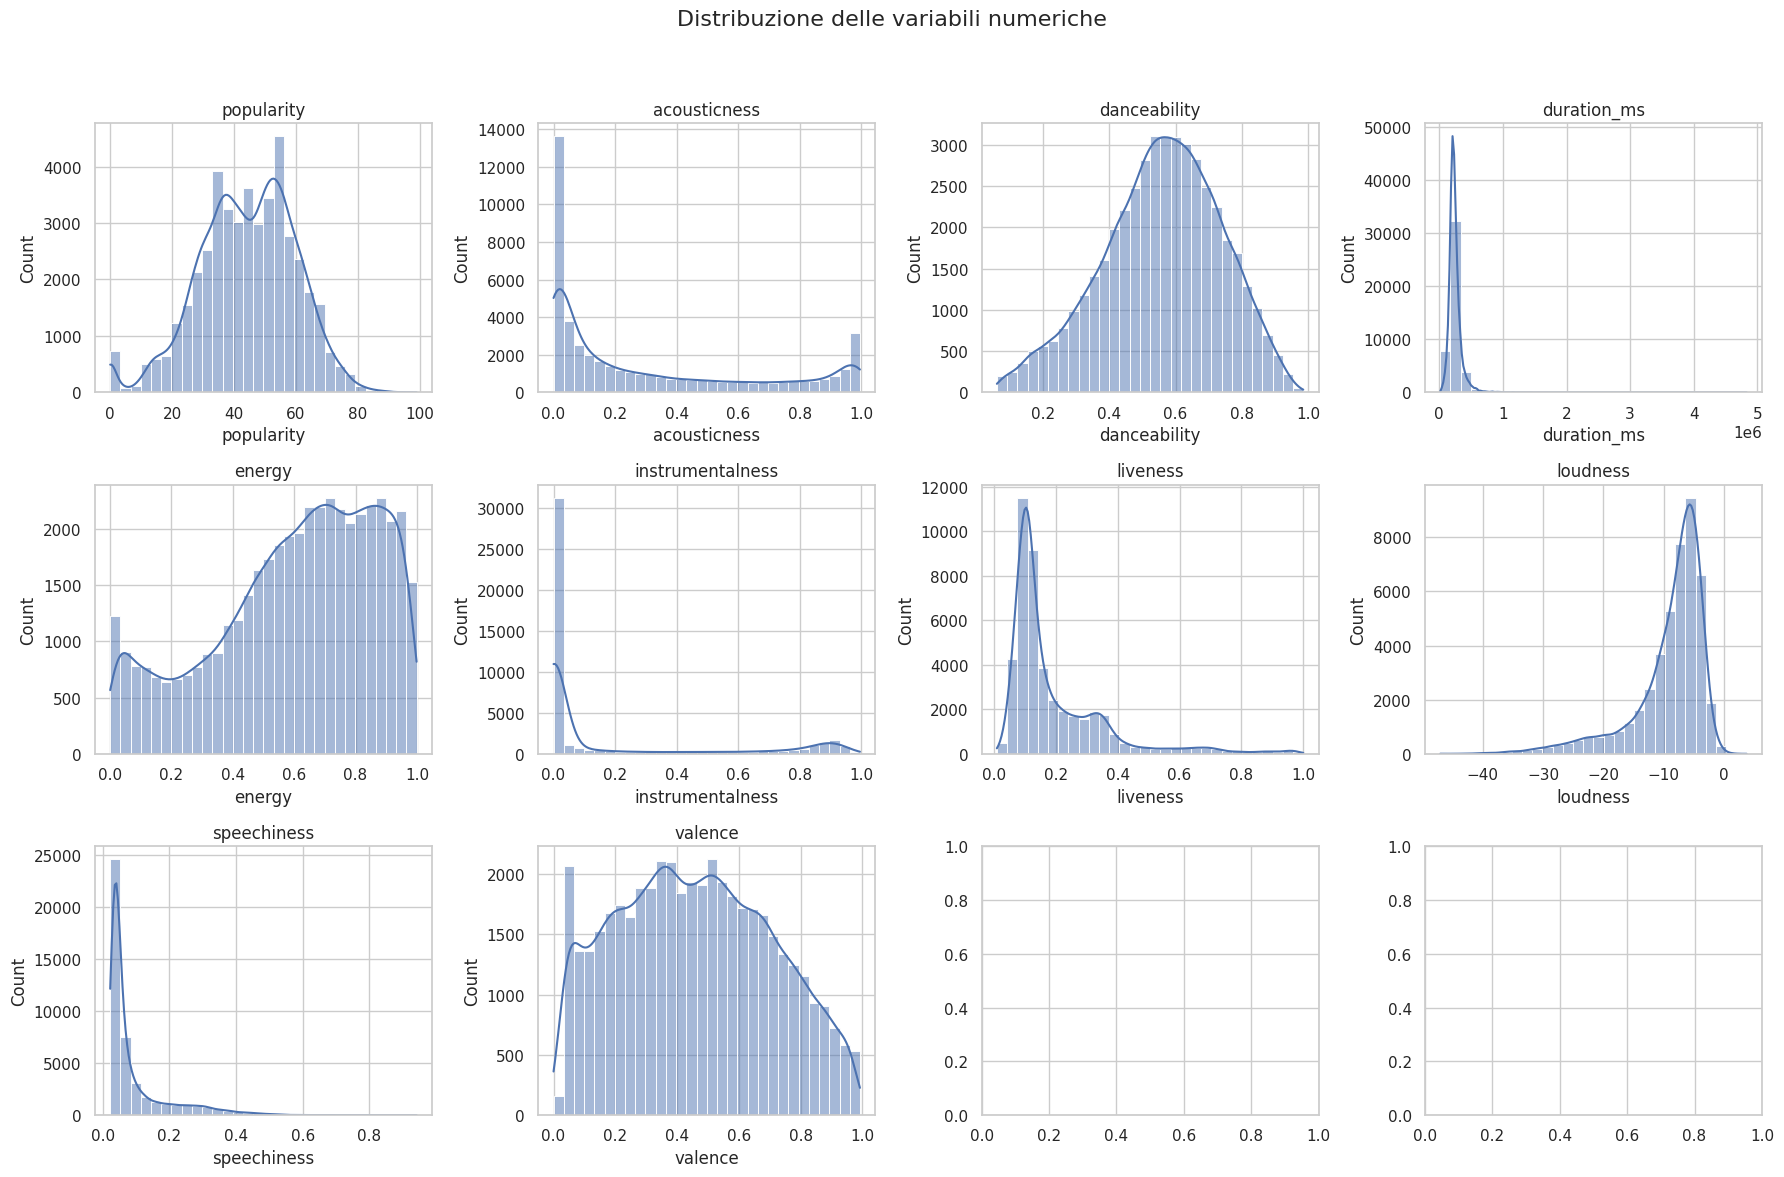

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a consistent style
sns.set(style="whitegrid")

# Plot distributions of numerical features
fig, axes = plt.subplots(3, 4, figsize=(18, 12))
fig.suptitle('Distribuzione delle variabili numeriche', fontsize=16)

numerical_cols = ['popularity', 'acousticness', 'danceability', 'duration_ms',
                  'energy', 'instrumentalness', 'liveness', 'loudness',
                  'speechiness', 'valence']

for ax, col in zip(axes.flatten(), numerical_cols):
    sns.histplot(df_cleaned[col], bins=30, kde=True, ax=ax)
    ax.set_title(col)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()




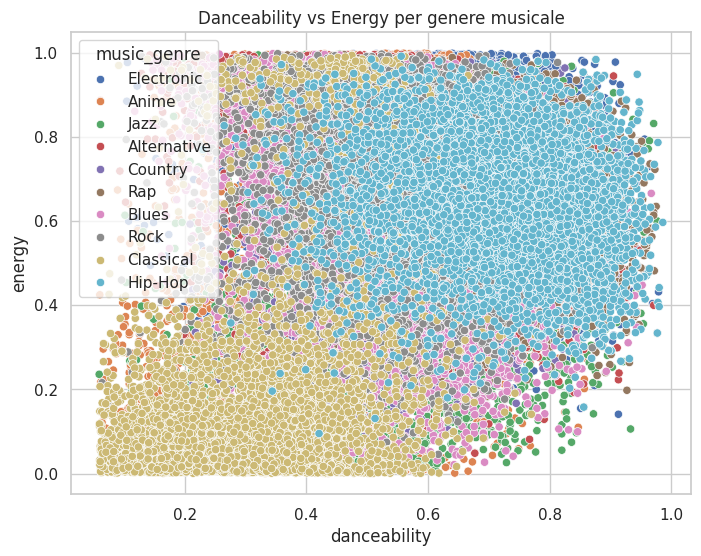

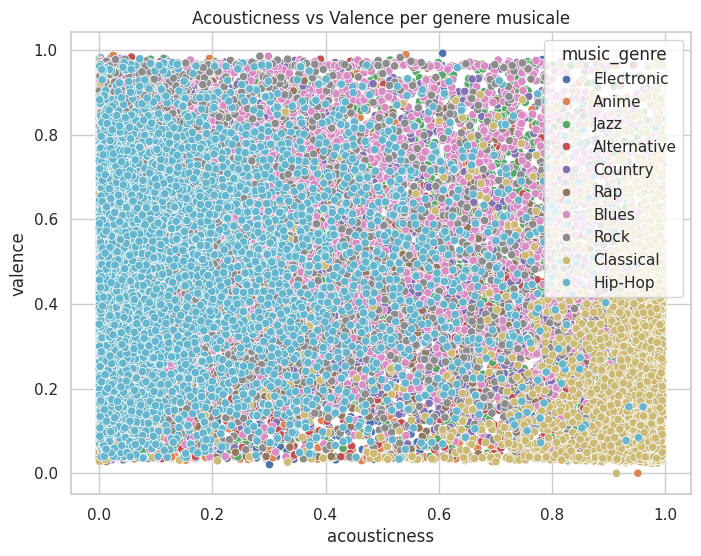

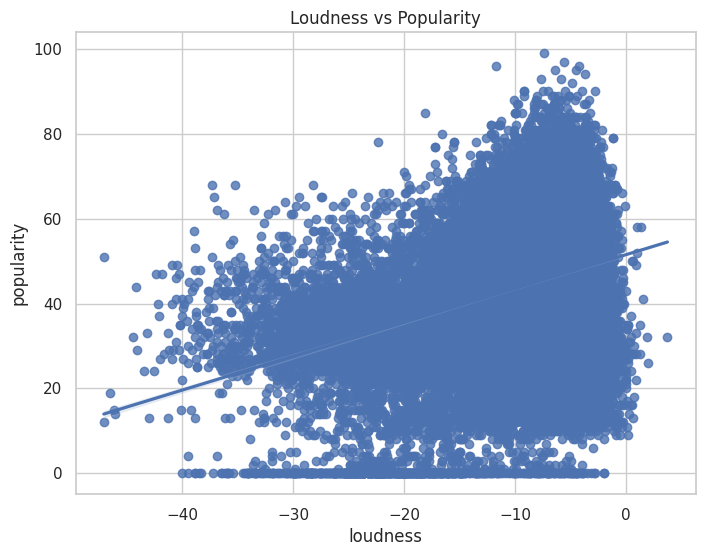

In [6]:

import matplotlib.pyplot as plt
# Analyze the relationship between danceability and energy
plt.figure(figsize=(8, 6))
sns.scatterplot(x='danceability', y='energy', hue='music_genre', data=df_cleaned)
plt.title('Danceability vs Energy per genere musicale')
plt.show()

# Analyze the relationship between acousticness and valence
plt.figure(figsize=(8, 6))
sns.scatterplot(x='acousticness', y='valence', hue='music_genre', data=df_cleaned)
plt.title('Acousticness vs Valence per genere musicale')
plt.show()

# Analyze the relationship between loudness and popularity
plt.figure(figsize=(8, 6))
sns.regplot(x='loudness', y='popularity', data=df_cleaned)
plt.title('Loudness vs Popularity')
plt.show()



Let's analyze the relationship between the attributes and our future target for the model (music genre)

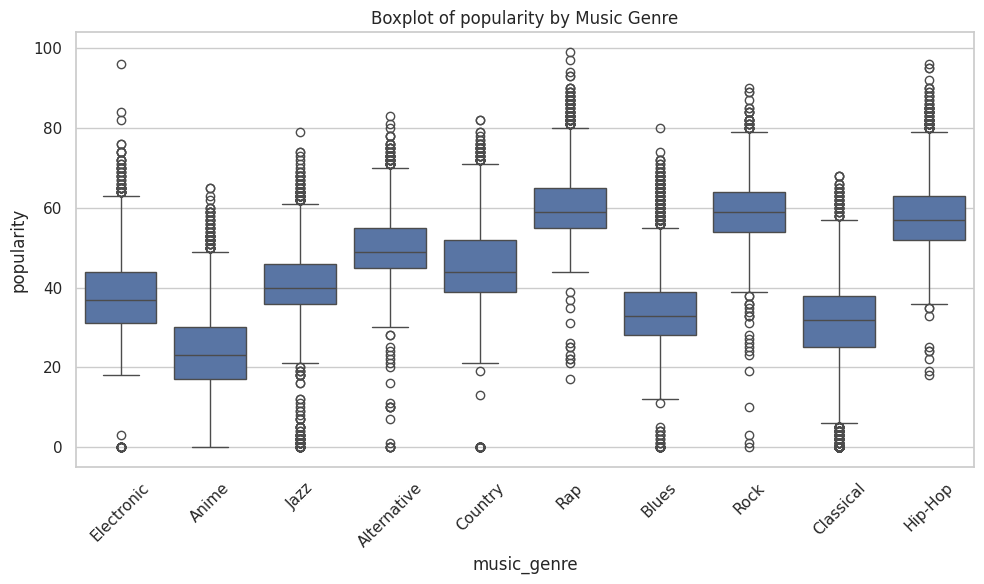

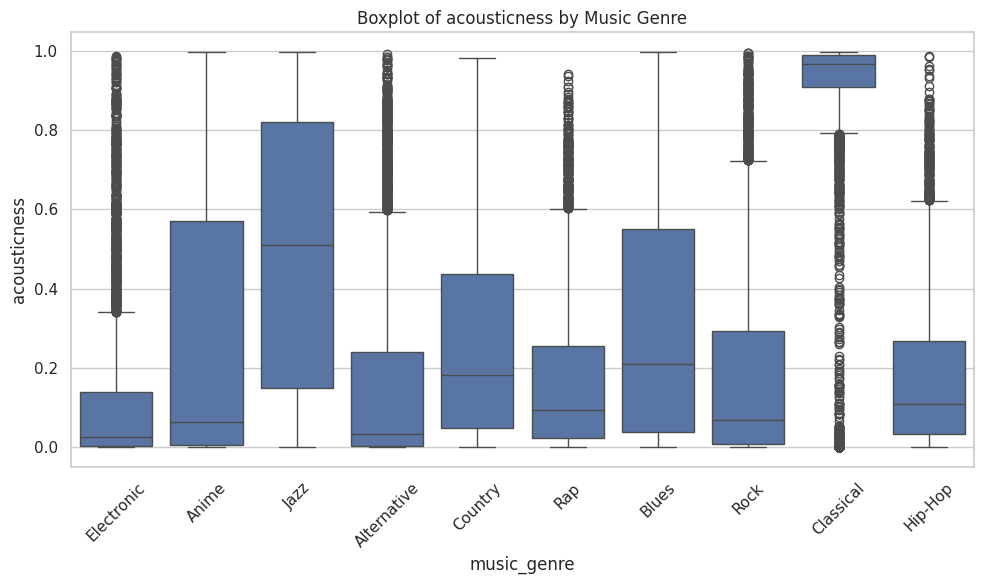

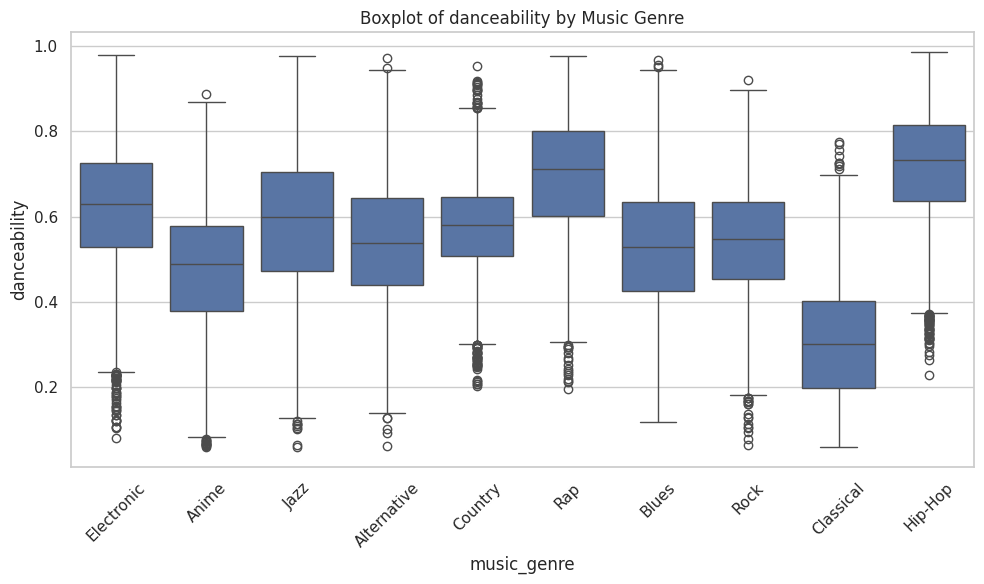

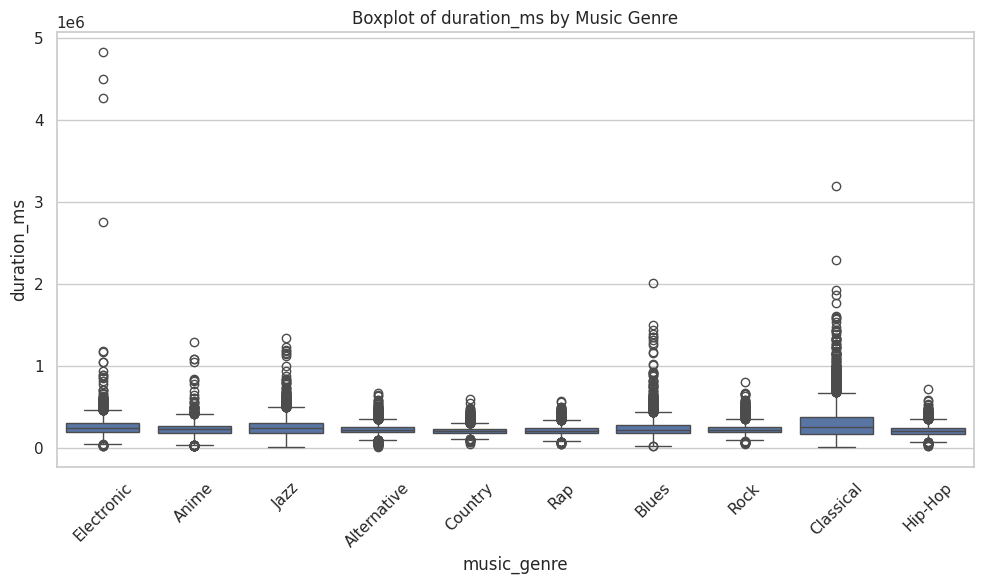

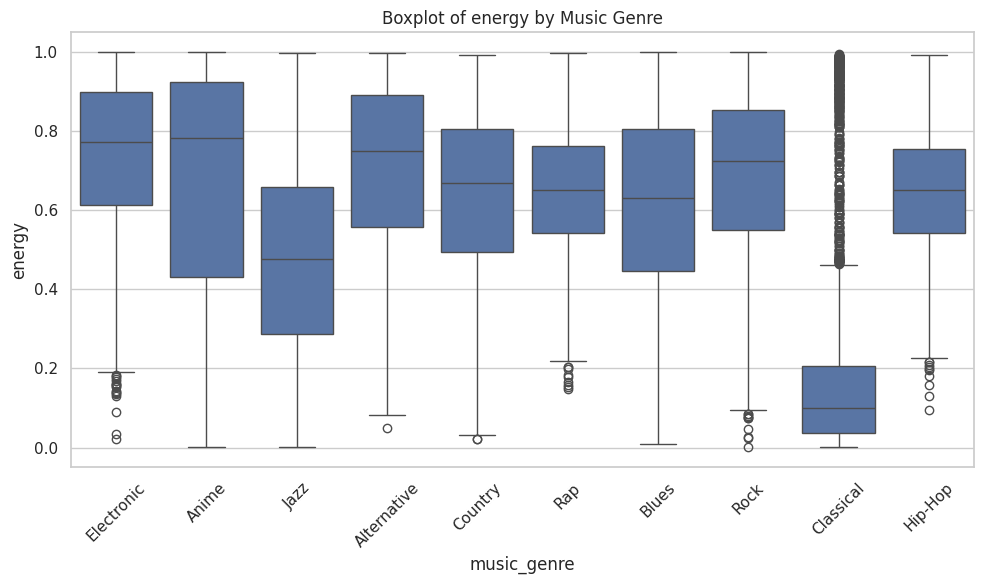

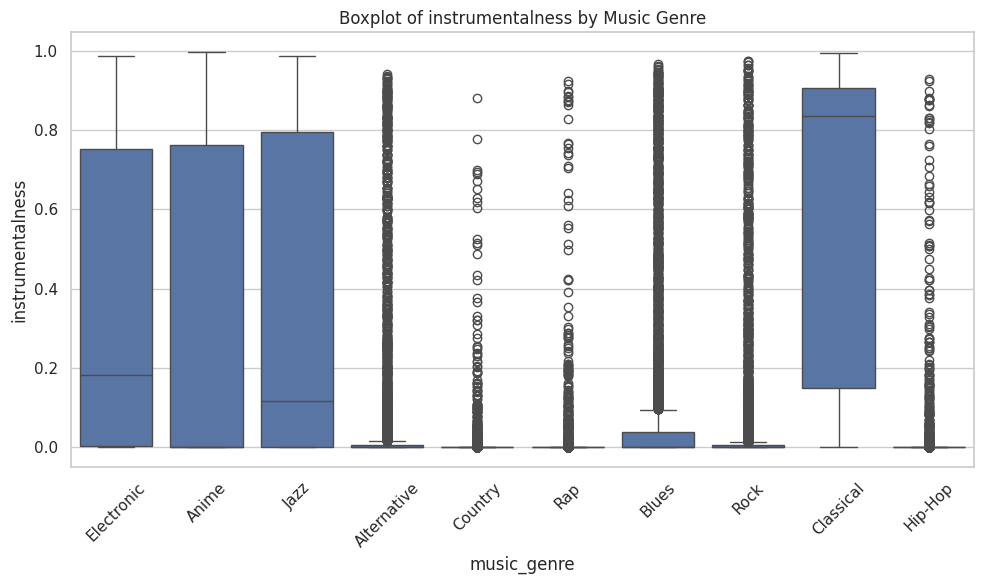

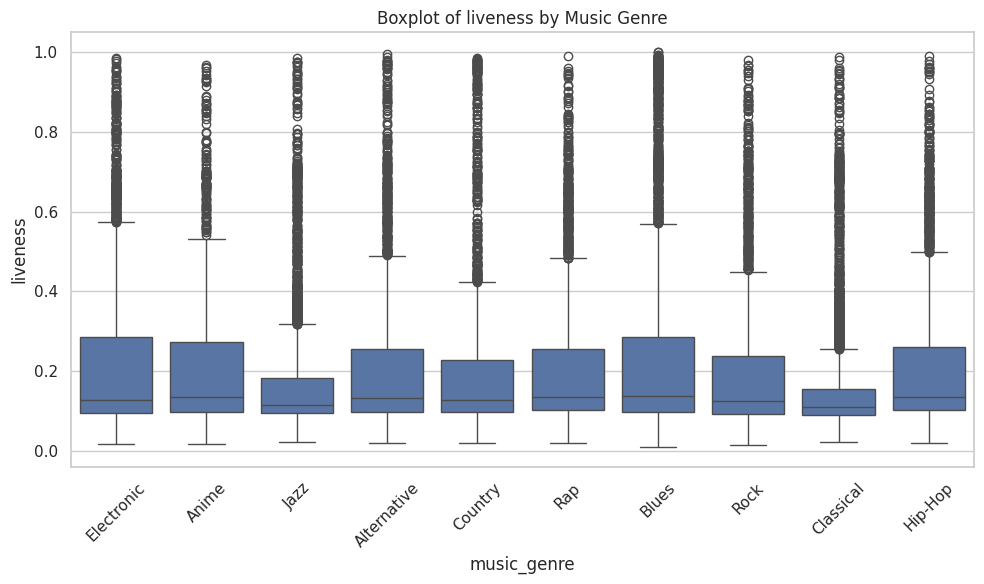

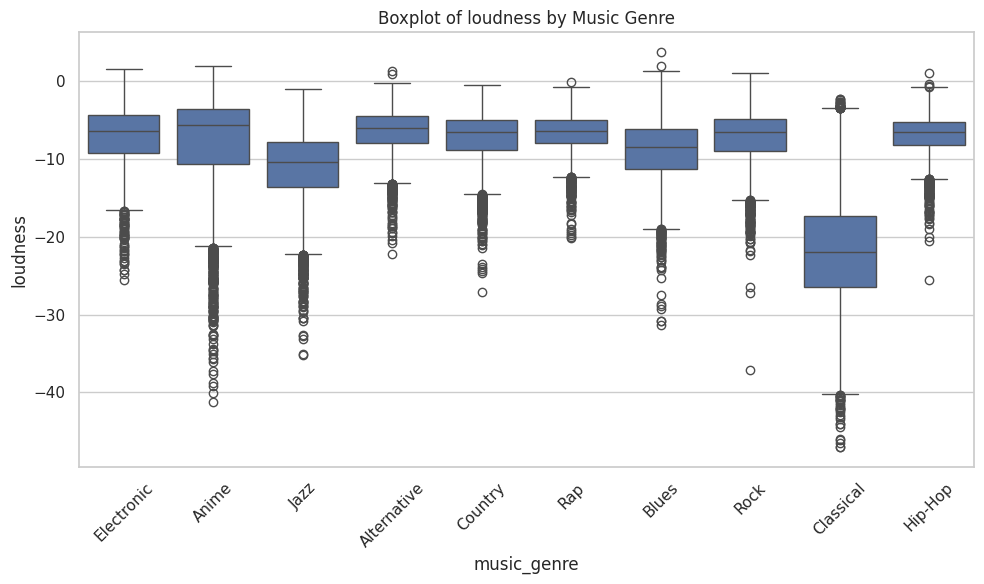

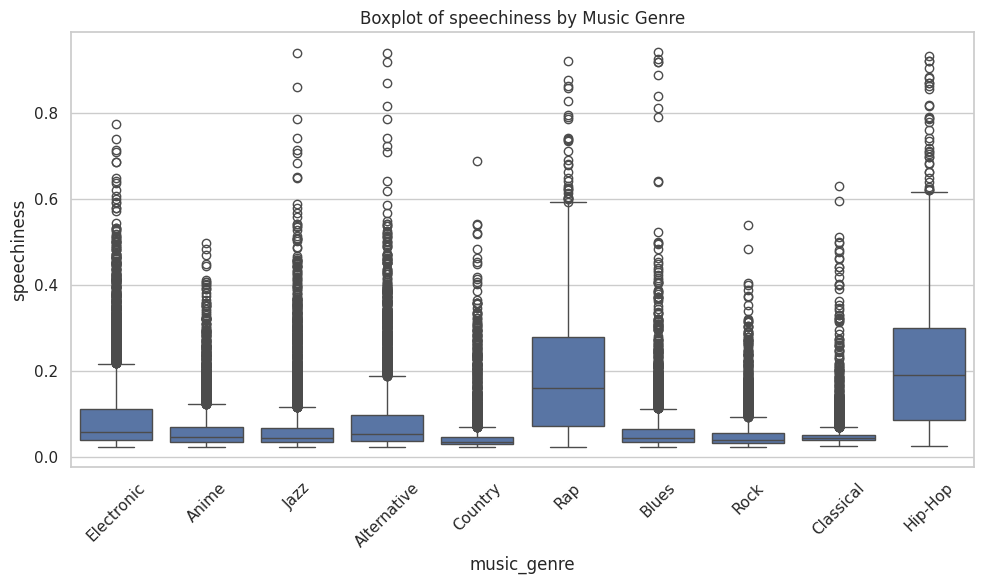

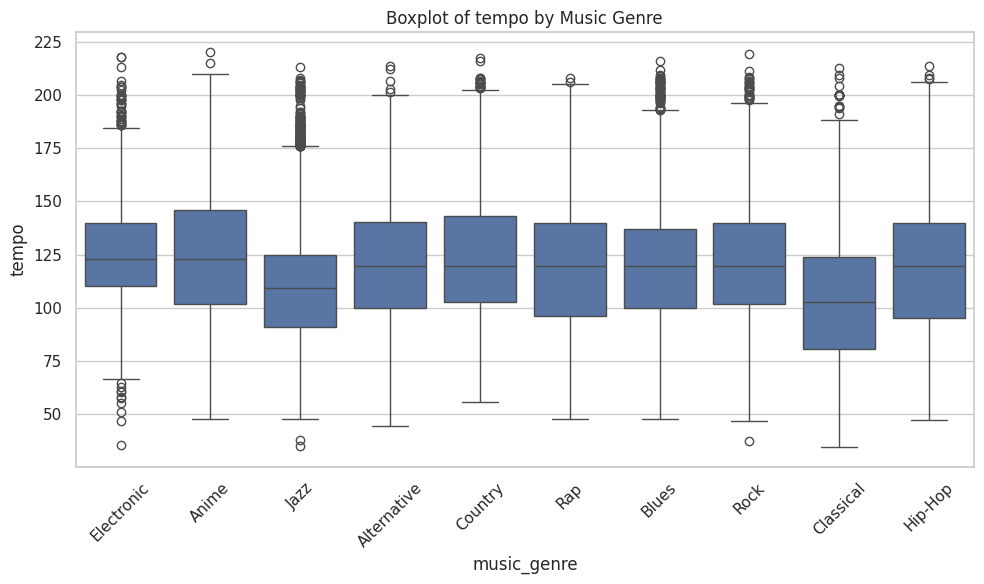

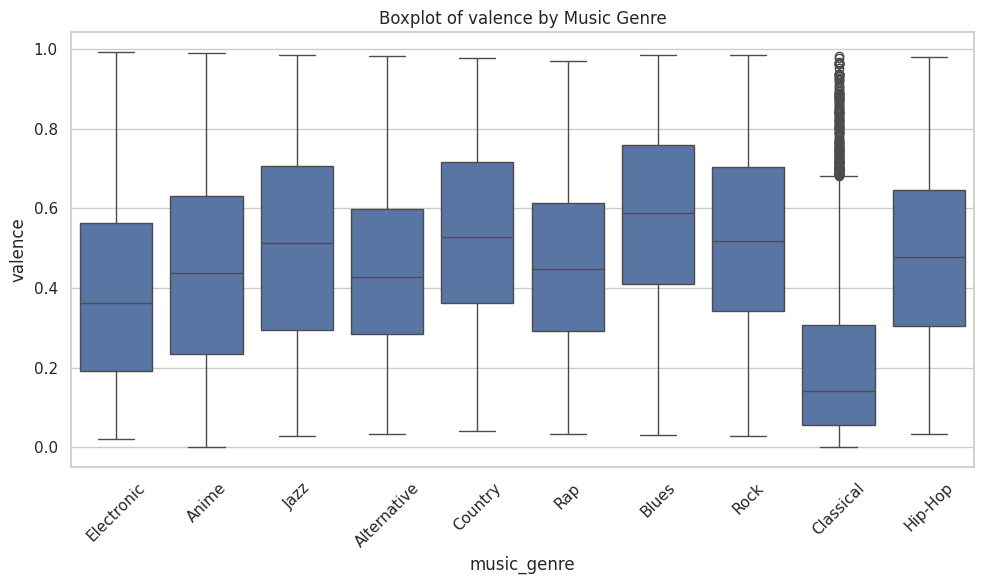

In [7]:

# Redefine the numerical attributes list
numerical_attributes = ['popularity', 'acousticness', 'danceability', 'duration_ms',
                        'energy', 'instrumentalness', 'liveness', 'loudness',
                        'speechiness', 'tempo', 'valence']

# Generate boxplots for each numerical attribute by music genre
for attribute in numerical_attributes:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='music_genre', y=attribute, data=df_cleaned)
    plt.title(f'Boxplot of {attribute} by Music Genre')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Now let's show a boxplot of the features in order to see the distribution of these attributes

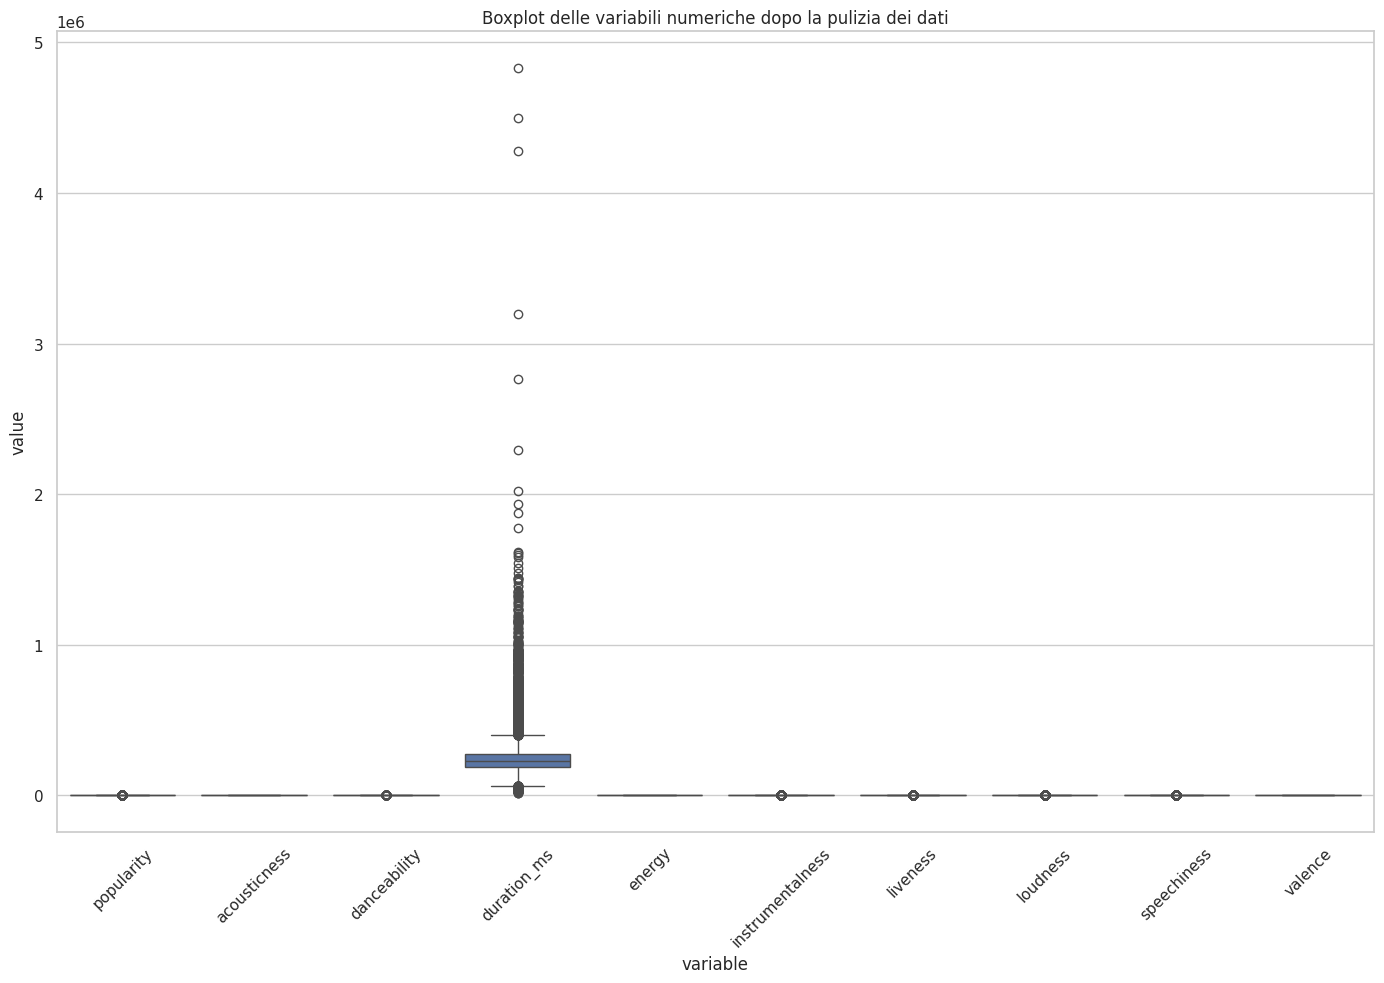

In [8]:
# Clean the dataset by removing rows with missing or invalid values in the numerical columns (if there still are)
df_cleaned_numeric = df_cleaned[numerical_cols].apply(pd.to_numeric, errors='coerce').dropna()

# Create a boxplot for each numerical feature in the dataset after cleaning
plt.figure(figsize=(14, 10))
df_melted_cleaned = pd.melt(df_cleaned_numeric)  # Reshape data for easy plotting
sns.boxplot(x='variable', y='value', data=df_melted_cleaned)
plt.title('Boxplot delle variabili numeriche dopo la pulizia dei dati')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


As we can see, duration has numerous outliers that could overly impact a future model, so let's handle them.

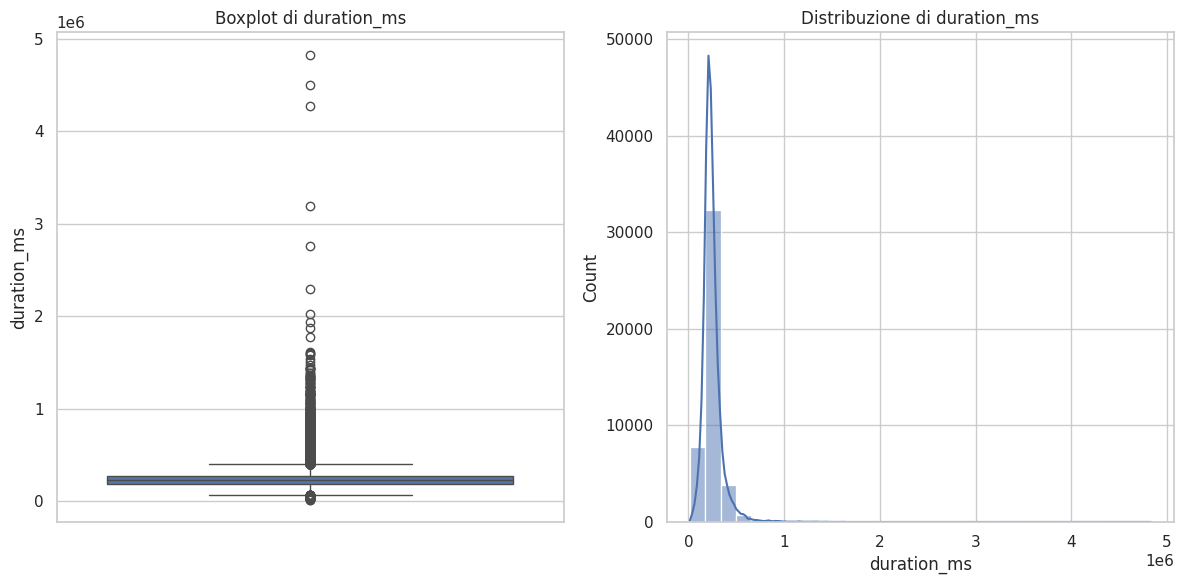

In [9]:
# Visualizing outliers in the 'duration_ms' column
plt.figure(figsize=(12, 6))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(df_cleaned_numeric['duration_ms'])
plt.title('Boxplot di duration_ms')

# Histogram
plt.subplot(1, 2, 2)
sns.histplot(df_cleaned_numeric['duration_ms'], bins=30, kde=True)
plt.title('Distribuzione di duration_ms')

plt.tight_layout()
plt.show()

Let's proceed with capping by setting the outliers to a capping value.

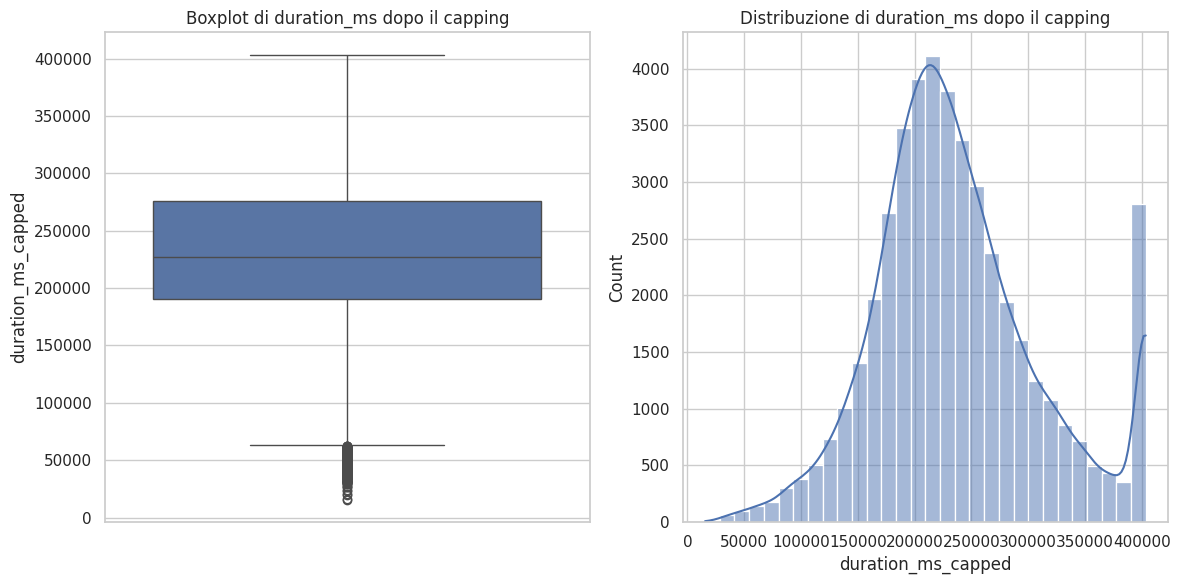

In [10]:
# Calculate the IQR for 'duration_ms'
Q1 = df_cleaned_numeric['duration_ms'].quantile(0.25)
Q3 = df_cleaned_numeric['duration_ms'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper bound (1.5 * IQR above the third quartile)
upper_bound = Q3 + 1.5 * IQR

# Cap the 'duration_ms' values at the upper bound
df_cleaned_numeric['duration_ms_capped'] = df_cleaned_numeric['duration_ms'].apply(lambda x: min(x, upper_bound))

# Visualize the result after capping
plt.figure(figsize=(12, 6))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(df_cleaned_numeric['duration_ms_capped'])
plt.title('Boxplot di duration_ms dopo il capping')

# Histogram
plt.subplot(1, 2, 2)
sns.histplot(df_cleaned_numeric['duration_ms_capped'], bins=30, kde=True)
plt.title('Distribuzione di duration_ms dopo il capping')

plt.tight_layout()
plt.show()


Now that we've shown the data distribution and analyzed the popularity for each genre (which will be useful in the future), let's move on to eliminating the attributes that certainly have no practical use for training the model, such as:

* instance_id: This is a unique identifier for each track, but it doesn't add
useful information for predicting the genre. Definitely to be removed.

* artist_name and track_name: Although they could influence the genre (for example, certain artists only produce one type of music), these attributes represent proper names rather than intrinsic characteristics of the music itself. Additionally, they could cause overfitting issues, as a model might simply associate an artist or a song with a genre without generalizing. These should also be removed.

* obtained_date: This column represents the date when the data was collected. It is not relevant to the music genre and can be removed.

In [11]:
# Eliminate the columns that are definitely not useful for the model
columns_to_drop = ['instance_id', 'artist_name', 'track_name', 'obtained_date']
df_preprocessed = df_cleaned.drop(columns=columns_to_drop)

# Show the first rows of the preprocessed dataset
df_preprocessed.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.0020,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.9940,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.0140,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.0360,0.323,Electronic
5,47.0,0.00523,0.755,519468.0,0.731,0.85400,D,0.216,-10.517,Minor,0.0412,119.7555,0.614,Electronic


Let's move on to encoding the categorical variables: for the **genre**, we will use one-hot encoding in order to preserve the names of the different classes, while for key and mode we will use a different type of encoding to avoid overly increasing the number of features.

In [12]:
from sklearn.preprocessing import LabelEncoder

# Perform One-Hot Encoding only on the 'music_genre' variable
df_encoded = pd.get_dummies(df_preprocessed, columns=['music_genre'], drop_first=False)

# Use Label Encoding for 'key' and 'mode' to maintain numerical values
label_encoder_key = LabelEncoder()
label_encoder_mode = LabelEncoder()

df_encoded['key'] = label_encoder_key.fit_transform(df_encoded['key'])
df_encoded['mode'] = label_encoder_mode.fit_transform(df_encoded['mode'])

# Show the first rows of the dataset with the applied encodings
df_encoded.head()


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,...,music_genre_Alternative,music_genre_Anime,music_genre_Blues,music_genre_Classical,music_genre_Country,music_genre_Electronic,music_genre_Hip-Hop,music_genre_Jazz,music_genre_Rap,music_genre_Rock
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,5,0.124,-7.043,1,...,False,False,False,False,False,True,False,False,False,False
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,11,0.534,-4.617,0,...,False,False,False,False,False,True,False,False,False,False
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,4,0.157,-4.498,0,...,False,False,False,False,False,True,False,False,False,False
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,9,0.157,-6.266,0,...,False,False,False,False,False,True,False,False,False,False
5,47.0,0.00523,0.755,519468.0,0.731,0.85400,5,0.216,-10.517,1,...,False,False,False,False,False,True,False,False,False,False


Following this, we will perform Min-Max normalization on the data with a range from 0 to 1 in order to have all the attributes within the same range, which will facilitate the work of generating models for distance-based algorithms.

In [13]:
from sklearn.preprocessing import MinMaxScaler

# Select the numerical columns to normalize
numerical_columns = ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
                     'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Apply the MinMaxScaler only to the numerical columns
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

# Show the first rows of the normalized dataset
df_encoded.head()


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,...,music_genre_Alternative,music_genre_Anime,music_genre_Blues,music_genre_Classical,music_genre_Country,music_genre_Electronic,music_genre_Hip-Hop,music_genre_Jazz,music_genre_Rap,music_genre_Rock
1,0.313131,0.012751,0.607081,0.042114,0.890804,0.953815,5,0.115446,0.787616,1,...,False,False,False,False,False,True,False,False,False,False
2,0.282828,0.003072,0.604922,0.041558,0.755562,0.011847,11,0.529450,0.835381,0,...,False,False,False,False,False,True,False,False,False,False
3,0.343434,0.025502,0.771157,0.031436,0.700463,0.002540,4,0.148769,0.837724,0,...,False,False,False,False,False,True,False,False,False,False
4,0.323232,0.004669,0.624352,0.042961,0.587260,0.912651,9,0.148769,0.802914,0,...,False,False,False,False,False,True,False,False,False,False
5,0.474747,0.005251,0.750648,0.104662,0.731519,0.857430,5,0.208345,0.719216,1,...,False,False,False,False,False,True,False,False,False,False


Lastly let's produce the output dataset obtained after the pre-processing



In [14]:

output_file_path = 'dataset_preprocessed.csv'
df_encoded.to_csv(output_file_path, index=False)

output_file_path

'dataset_preprocessed.csv'

In [15]:
df_info = df_encoded.info()
df_head = df_encoded.head()

df_info, df_head

<class 'pandas.core.frame.DataFrame'>
Index: 45061 entries, 1 to 50004
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   popularity               45061 non-null  float64
 1   acousticness             45061 non-null  float64
 2   danceability             45061 non-null  float64
 3   duration_ms              45061 non-null  float64
 4   energy                   45061 non-null  float64
 5   instrumentalness         45061 non-null  float64
 6   key                      45061 non-null  int64  
 7   liveness                 45061 non-null  float64
 8   loudness                 45061 non-null  float64
 9   mode                     45061 non-null  int64  
 10  speechiness              45061 non-null  float64
 11  tempo                    45061 non-null  float64
 12  valence                  45061 non-null  float64
 13  music_genre_Alternative  45061 non-null  bool   
 14  music_genre_Anime        45

(None,
    popularity  acousticness  danceability  duration_ms    energy  \
 1    0.313131      0.012751      0.607081     0.042114  0.890804   
 2    0.282828      0.003072      0.604922     0.041558  0.755562   
 3    0.343434      0.025502      0.771157     0.031436  0.700463   
 4    0.323232      0.004669      0.624352     0.042961  0.587260   
 5    0.474747      0.005251      0.750648     0.104662  0.731519   
 
    instrumentalness  key  liveness  loudness  mode  ...  \
 1          0.953815    5  0.115446  0.787616     1  ...   
 2          0.011847   11  0.529450  0.835381     0  ...   
 3          0.002540    4  0.148769  0.837724     0  ...   
 4          0.912651    9  0.148769  0.802914     0  ...   
 5          0.857430    5  0.208345  0.719216     1  ...   
 
    music_genre_Alternative  music_genre_Anime  music_genre_Blues  \
 1                    False              False              False   
 2                    False              False              False   
 3      